In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv('../Dataset/parkinsons.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
data = data.replace([np.inf, -np.inf], np.nan)

In [14]:
data = data.dropna()

In [15]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['name'] 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
del data['name']

In [17]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

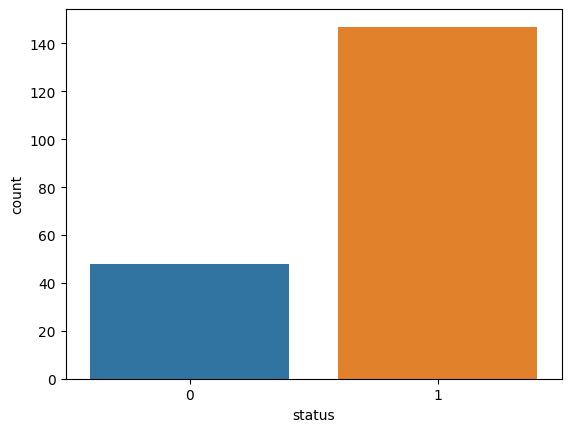

In [18]:
sns.countplot(x=data['status'])

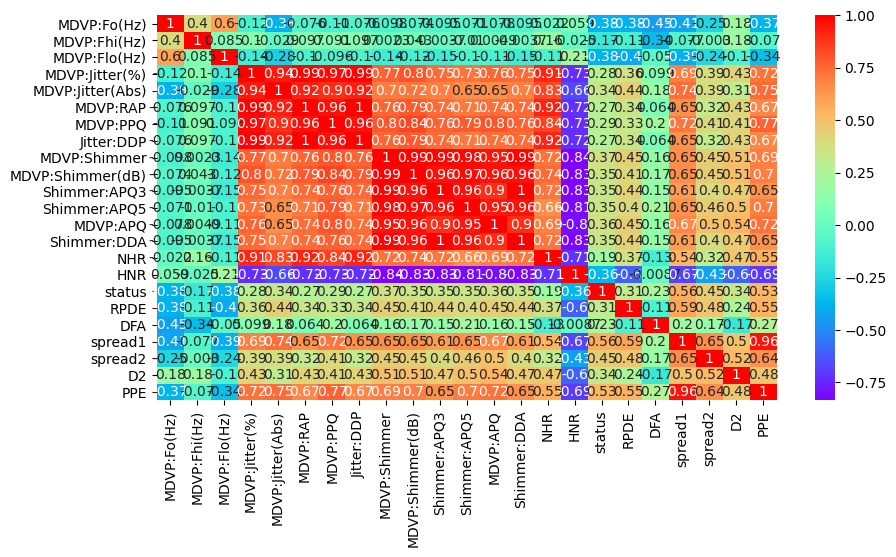

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [20]:
X = data.drop(["status"],axis =1)
y = data["status"]

In [21]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [22]:
ada = SMOTE(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

In [23]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [24]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

In [42]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
140,170.368000,268.796000,79.543000,0.005710,0.000030,0.002320,0.002690,0.006960,0.032730,0.281000,...,0.028240,0.051390,0.024850,18.540000,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227
236,187.809845,246.645640,86.343975,0.005750,0.000030,0.003366,0.003266,0.010097,0.033399,0.330931,...,0.022576,0.057019,0.035921,19.443424,0.478086,0.670670,-6.734074,0.140686,2.489028,0.123069
266,232.743118,250.130307,222.894756,0.002447,0.000009,0.001375,0.001425,0.004125,0.015830,0.143949,...,0.010660,0.026480,0.004879,24.843670,0.288900,0.665323,-7.416944,0.074699,2.179772,0.082743
96,159.116000,168.913000,144.811000,0.003420,0.000020,0.001780,0.001840,0.005350,0.033810,0.307000,...,0.028090,0.054170,0.008520,22.663000,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
177,151.737000,190.204000,129.859000,0.003140,0.000020,0.001350,0.001620,0.004060,0.014690,0.132000,...,0.012300,0.021840,0.005700,24.151000,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,114.563000,119.167000,86.647000,0.003270,0.000030,0.001460,0.001840,0.004390,0.011850,0.106000,...,0.010950,0.016720,0.007030,24.775000,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
71,136.358000,176.595000,65.750000,0.009710,0.000070,0.005340,0.004780,0.016010,0.049780,0.483000,...,0.037360,0.082470,0.033610,18.570000,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
106,155.078000,163.736000,144.148000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010640,0.097000,...,0.009280,0.015670,0.002330,29.746000,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
270,198.796419,212.418663,192.608387,0.002262,0.000010,0.001233,0.001365,0.003698,0.011417,0.100236,...,0.008585,0.017204,0.001425,30.855727,0.449553,0.740343,-7.368653,0.174270,1.801341,0.082709


In [27]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(C=1.0,kernel = 'rbf', degree = 3, gamma = 'scale', probability=True, tol = 0.001,cache_size=200,max_iter=-1,random_state=0)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test)
svc_rec = recall_score(y_pred, y_test)
svc_f1 = f1_score(y_pred, y_test)

storeResults('Support Vector Machine',svc_acc,svc_prec,svc_rec,svc_f1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(criterion='gini',max_depth=300,min_samples_split=2,max_features=None,random_state=0,max_leaf_nodes=None)#,alpha=0.0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)

storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=300,  max_features='sqrt',
                           bootstrap = True, random_state = 0, max_samples = None)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)

storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

In [30]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision
                      })

In [31]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Support Vector Machine,0.703,0.733,0.706,0.762
1,Decision Tree,0.898,0.903,0.918,0.889
2,Random Forest,0.958,0.959,0.983,0.937


In [32]:
import joblib
filename = 'parkinson.sav'
joblib.dump(rf, filename)

['parkinson.sav']

In [33]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

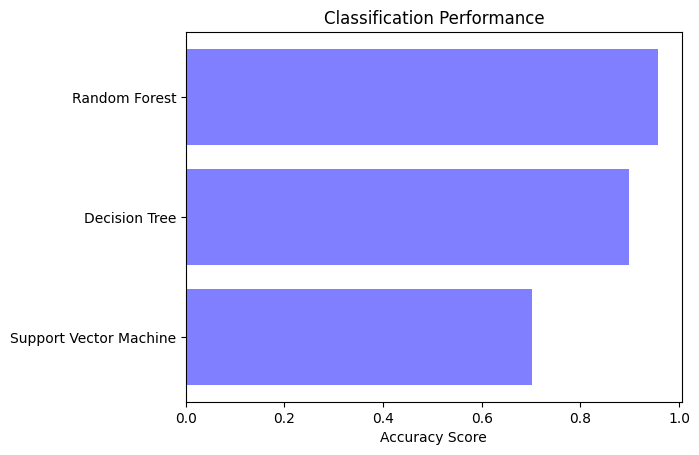

In [34]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

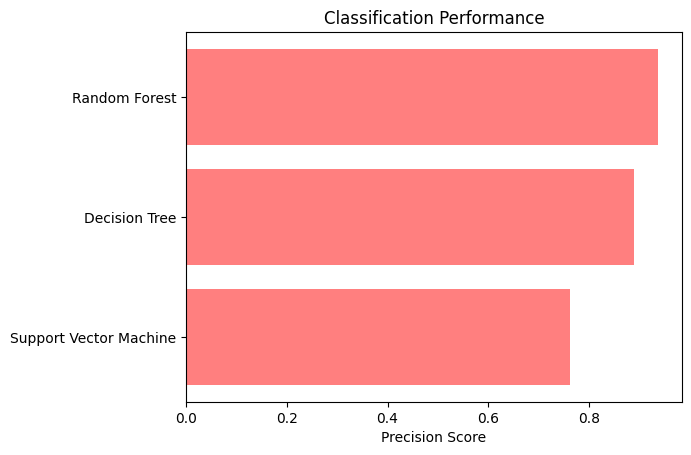

In [35]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

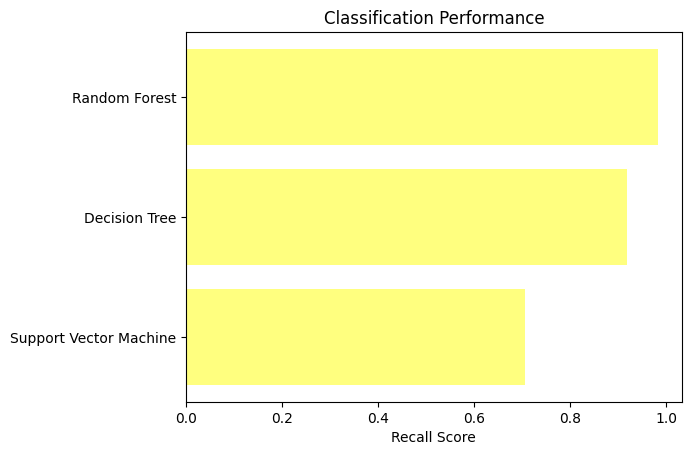

In [36]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

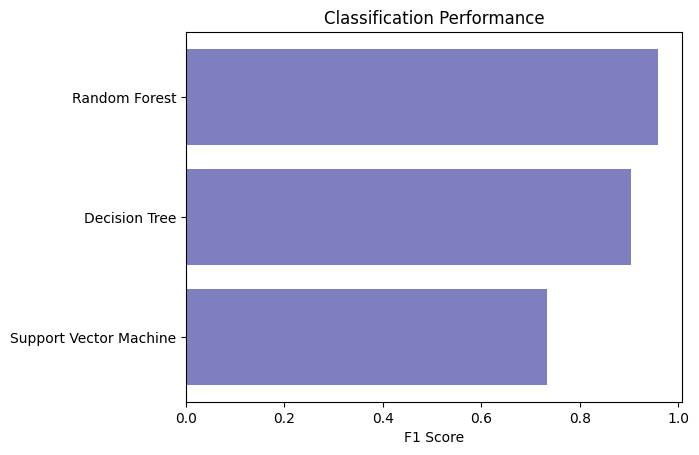

In [37]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()
